In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df=pd.read_pickle('cleaned_imbalanced.pkl')
df

,Review,Rating,Review_clean,sentiment
0,Some major design flaws,3,major design flaw,0.0000
1,My favorite buy!,5,favorite buy,0.4588
2,Flattering shirt,5,flattering shirt,0.3182
3,Not for the very petite,2,petite,0.0000
4,Cagrcoal shimmer fun,5,cagrcoal shimmer fun,0.5106
...,...,...,...,...
29605,Perfect wedding dress! Just get it!,5,perfect wedding dress,0.5719
29606,Elegant 💞💞💞,5,elegant,0.4767
29607,Dress felt and fit great. I got lots of compl...,5,dress feel fit great get lot compliment,0.8658
29608,Loved the dress but poor quality,2,love dress poor quality,0.2732


 # creating balanced and imbalanced data


In [11]:

#creating balanced data
balanced_df = df.groupby('Rating').apply(lambda x: x.sample(n=2000, random_state=42)).reset_index(drop=True)

#adding a column key
df['key'] = df.astype(str).agg('-'.join, axis=1)
balanced_df['key'] = balanced_df.astype(str).agg('-'.join, axis=1)

# Remove balanced rows to get remaining using key column
remaining_df = df[~df['key'].isin(balanced_df['key'])].drop(columns='key')
balanced_df = balanced_df.drop(columns='key')


base_1_star = len(remaining_df[remaining_df['Rating'] == 1])



target_counts = {
    1: base_1_star,                # 1x
    2: int(1.5 * base_1_star),     # 1.5x
    3: int(2.5 * base_1_star),       # 2.5x
    4: int(3 * base_1_star),       # 3x
    5: int(2 * base_1_star),       # 2x
}


imbalanced_parts = []

for rating, target in target_counts.items():
    subset = remaining_df[remaining_df['Rating'] == rating]
    replace = target > len(subset)  # only upsample if not enough data
    sampled = subset.sample(n=target, replace=replace, random_state=42)
    imbalanced_parts.append(sampled)

# Step 6: Combine imbalanced data
imbalanced_df = pd.concat(imbalanced_parts).reset_index(drop=True)





C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11768\1360112914.py:2: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  balanced_df = df.groupby('Rating').apply(lambda x: x.sample(n=2000, random_state=42)).reset_index(drop=True)


In [12]:
# Step 7: Final Checks
print("\n Balanced Dataset Distribution:")
print(balanced_df['Rating'].value_counts())

print("\n Imbalanced Dataset Distribution:")
print(imbalanced_df['Rating'].value_counts())


 Balanced Dataset Distribution:
Rating
1    2000
2    2000
3    2000
4    2000
5    2000
Name: count, dtype: int64

 Imbalanced Dataset Distribution:
Rating
4    1917
3    1597
5    1278
2     958
1     639
Name: count, dtype: int64


In [13]:
# Check overlap between balanced and imbalanced datasets
overlap = pd.merge(balanced_df, imbalanced_df, how='inner')
print("Number of duplicate rows between balanced and imbalanced:", len(overlap))


Number of duplicate rows between balanced and imbalanced: 0


# data visualization for imbalanced data

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11768\2584613656.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Rating', data=imbalanced_df, palette='viridis')


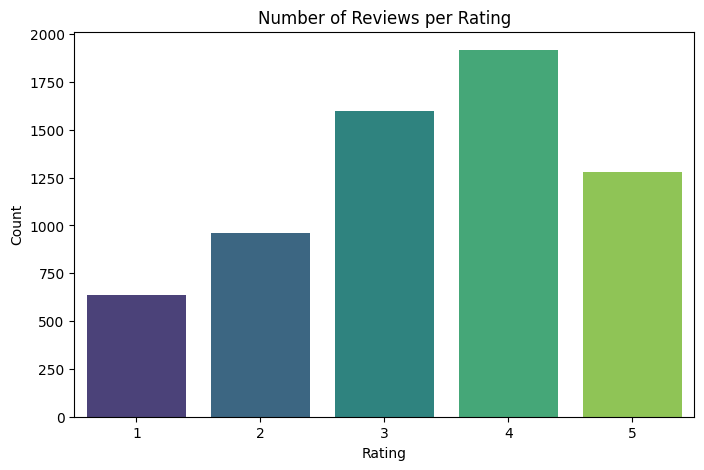

In [19]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Rating', data=imbalanced_df, palette='viridis')
plt.title("Number of Reviews per Rating")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()


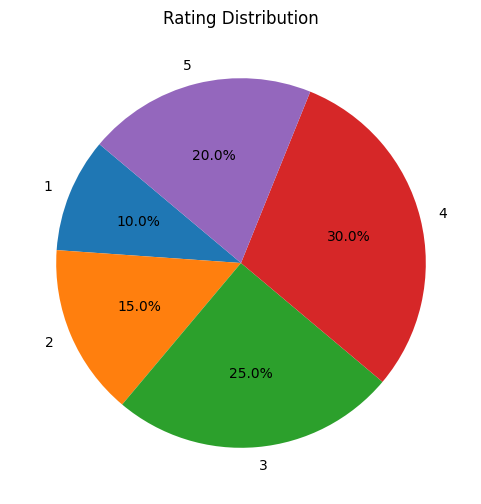

In [21]:
rating_counts = imbalanced_df['Rating'].value_counts().sort_index()
plt.figure(figsize=(6, 6))
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Rating Distribution")
plt.show()


In [ ]:
balanced_df.to_csv("balanced_dataset.csv", index=False, encoding="utf-8-sig")
imbalanced_df.to_csv("imbalanced_ratio_dataset.csv", index=False, encoding="utf-8-sig")